<h1> Groupe 5 - Prediction
> Draft Notebook

<span class="tocSkip"></span>
> *Authors : All*

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Environment" data-toc-modified-id="Environment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Environment</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data loading</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Functions</a></span></li></ul></li><li><span><a href="#Code-cemetery" data-toc-modified-id="Code-cemetery-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Code cemetery</a></span><ul class="toc-item"><li><span><a href="#Supervised-learning-and-clustering-work" data-toc-modified-id="Supervised-learning-and-clustering-work-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Supervised learning and clustering work</a></span><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Model-creation" data-toc-modified-id="Model-creation-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Model creation</a></span></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Model evaluation</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Clustering</a></span></li><li><span><a href="#Clusters-evaluation" data-toc-modified-id="Clusters-evaluation-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Clusters evaluation</a></span></li></ul></li><li><span><a href="#Data-cleaning-and-filling-work" data-toc-modified-id="Data-cleaning-and-filling-work-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data cleaning and filling work</a></span><ul class="toc-item"><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Cleaning</a></span></li><li><span><a href="#Homogenizing" data-toc-modified-id="Homogenizing-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Homogenizing</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Analysis</a></span></li></ul></li></ul></li><li><span><a href="#Reasearch-work" data-toc-modified-id="Reasearch-work-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reasearch work</a></span></li></ul></div>

#  Introduction

This Notebook is a presentation of all the work that has been done by our group, but that will not be needed in the final pipeline. 

It is separeted in 3 main parts : 
- The first one is the environnement setting, with imports of libraries and functions, and data loading.
- The second one gathers the code that has been done, tested but that will not be used
- The last one gathers our research about what could be done in order to improve our models, and codes that was in progress at the end of the project

In every cell comments can be found about what is done into it. 

Some explaining cells will also be used sometimes in order to interprate, or conclude about the previous code cell.

# Environment

## Libraries 

In [58]:
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import accuracy_score
import datetime
import prince
import warnings
import holidays
from warnings import filterwarnings

In [59]:
filterwarnings('ignore')

## Data loading 

In [54]:
all_data = pd.read_excel(
    "C:/Users/laura/Documents/M2/Interpromo/Interpromo2020/Interpromo2020/All Data/ALL_DATA.xlsx")
all_data_annotate = pd.read_excel(
    "C:/Users/laura/Documents/M2/Interpromo/Interpromo2020/Interpromo2020/All Data/ALL_DATA_ANNOTATE.xlsx")

## Functions 

In [26]:
def get_F_score(clusters: list) -> tuple:
    """Documentation

    Parameters:
        clusters: list of clusters

    Out:
        F: variance_inter / variance_intra
        Out2 : 0 if bad discrimination
               0.5 if medium (didn't pass the Fisher test)
               1 if Ok
    References:
        1. https://masterchemoinfo.u-strasbg.fr/Documents/
                    Statistiques/Cours/ANOVA.PDF

    """

    variances = []
    means = []

    for cluster in clusters:
        variances.append(np.var(cluster))
        means.append(np.mean(cluster))

    variance_intra = np.mean(variances)
    variance_inter = np.var(means)

    if variance_intra == 0:
        variance_intra = 10**(-3)
    F = variance_inter / variance_intra
    ALPHA = 0.05
    p_value = stats.f.cdf(F, len(clusters), len(clusters))

    if F < 1:
        return(F, 'Highly unrepresentative cluster')
    elif p_value > ALPHA:
        return(F, 'Highly representative cluster')
    else:
        return(F, 'Moderately representative cluster')

In [27]:
#Replace empty values by an avergae mark (4) and add 1 for value > 3

def note(df, colonne):
    df[colonne] = df[colonne].apply(lambda x : x + 1 if x > 3 else x)
    df[colonne] = df[colonne].apply(lambda x : 4 if np.isnan(x) else x)
    return df

In [28]:
#Same as note function but for columns who has 10 marks and replace by (6)

def note_sur_10(df, colonne):
    df[colonne] = df[colonne].apply(lambda x : 4.5 if x == "na" else x)
    df[colonne] = df[colonne].apply(lambda x : x.replace(",",".") if isinstance(x, str) else x)
    df[colonne] = df[colonne].apply(lambda x : float(x))
    df[colonne] = df[colonne].apply(lambda x : 4.5 if np.isnan(x) else x)
    df[colonne] = df[colonne].apply(lambda x : x + 1 if x > 5 else x)
    df[colonne] = df[colonne].apply(lambda x : 6 if x == 4.5 else x)
    df[colonne] = df[colonne].apply(lambda x : round(x))
    return df

In [44]:
# Transform a string date into a standard format by trying each date format.
# If you want to add a format, add a try/except in the last except


def format_date(date: str) -> datetime.datetime:
    date_str = date
    m = "nc"

    if date_str != "nc":
        date_str = str(date_str)
        # Does not work for August
        if ("August" not in date_str):
            date_str = date_str.replace("st", "").replace("th", "")\
                .replace("nd", "").replace("rd", "").replace(" Augu ", " Aug ")
        # Transofrm string considering its format
        try:
            m = datetime.datetime.strptime(date_str, "%d %B %Y")
        except ValueError:
            try:
                m = datetime.datetime.strptime(date_str, "%d %b %Y")
            except ValueError:
                try:
                    m = datetime.datetime.strptime(date_str, "%Y/%m/%d")
                except ValueError:
                    try:
                        m = datetime.datetime\
                            .strptime(date_str, "%d/%m/%Y %H:%M:%S")
                    except ValueError:
                        try:
                            m = datetime.datetime\
                                .strptime(date_str, "%Y-%m-%d %H:%M:%S")
                        except ValueError:
                            try:
                                m = datetime.datetime.strptime(date_str,
                                                               "%d %m %Y")
                            except ValueError:
                                try:
                                    m = datetime.datetime.strptime(date_str,
                                                                   "%B %Y")
                                except ValueError:
                                    # HERE ADD A FORMAT TO CHECK
                                    print("Format not recognised. \nConsider "
                                          "adding a date format "
                                          "in the function \"format_date\".")
    return m

# Code cemetery 

This project can be separeted in 2 main phases, indeed, the third day we had to modify our organisation because the specifications changed. As a consequence, the first part of our work has not been re used after this day. In order to show what was our idea, and what have been done during this time, we decided to create this notebook part.

## Supervised learning and clustering work

In [32]:
all_data_supervised = all_data.copy()
all_data_clustering = all_data.copy()

### Data cleaning 

In [33]:
# Dropping some columns
all_data_supervised.drop(["Type_Of_Traveller", "Date_Visit", "Date_Flown", "Airport",
            "Route", "Category", "Category_Detail", "Date_Review",
            "Review", "Type_Of_Lounge", "Airline_Name", "Aircraft_Type",
            "Seat", "Overall_Customer_Rating"], axis=1, inplace=True)

all_data_clustering.drop(["Type_Of_Traveller", "Date_Visit", "Date_Flown", "Airport",
                       "Route", "Category", "Category_Detail", "Date_Review",
                       "Review", "Type_Of_Lounge", "Airline_Name", "Aircraft_Type",
                       "Seat", "Overall_Customer_Rating"], axis=1, inplace=True)

In [34]:
# Transforming qualitative data into quantitative ones
all_data_supervised = pd.get_dummies(all_data_supervised, columns=["Data_Source", "Airline_Type",
                                       "Region_Operation",
                                       "Cabin_Class",
                                       "Seat_Type", "Recommended"])

In [35]:
# Replacing missing values
for i in all_data_supervised.columns:
    all_data_supervised[i].fillna(all_data_supervised[i].median(), inplace=True)

for i in all_data_clustering.columns:
    try:
        all_data_clustering[i].fillna(all_data_clustering[i].median(), inplace=True)
    except:
        all_data_clustering[i].fillna('Empty', inplace=True)

### Model creation 

Only one variable will be predicted here (the only one exploitable under the V0 cleaning conditions), i.e. the "Seat_Comfort" variable, which is a score out of 5.

In [36]:
# Dividing Data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(
    all_data_supervised.drop(["Seat_Comfort"], axis=1),
    all_data_supervised["Seat_Comfort"], test_size=0.30, random_state=42)

# Training the modele and giving a prediction
model = LinearRegression(normalize=True)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

### Model evaluation 

In [37]:
print('Prediction score of V0 : ' +
      str(accuracy_score(np.round(prediction), Y_test)))

Prediction score of V0 : 0.6366093583835519


### Clustering

In [12]:
# Making FAMD in order to reduce dimension and taking
# into account qualitative and quantitative data

famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
famd = famd.fit(all_data_clustering)

In [13]:
famd_coordinates = famd.row_coordinates(all_data_clustering)

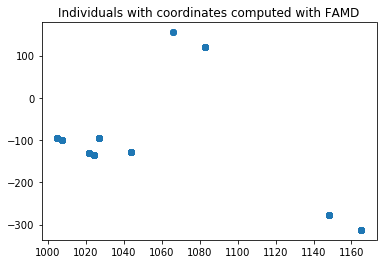

In [14]:
# Ploting individuals with coordinates computed with FAMD (only 10000)
plt.scatter(famd_coordinates[0][:10000], famd_coordinates[1][:10000])
plt.title('Individuals with coordinates computed with FAMD')
plt.show()

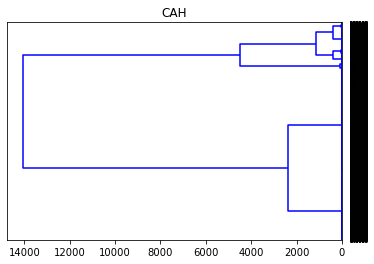

In [15]:
# Generating links matrix
Z = linkage(famd_coordinates[:10000], method='ward', metric='euclidean')

# Ploting the dendrogram
plt.title("CAH")
dendrogram(Z, labels=famd_coordinates.index,
           orientation='left', color_threshold=0)
plt.show()

In [16]:
# Cuting at t = 3000, 3 clusters obtained
groupes_cah = fcluster(Z,t=3000,criterion='distance')

# Sorted index of clusters
idg = np.argsort(groupes_cah)

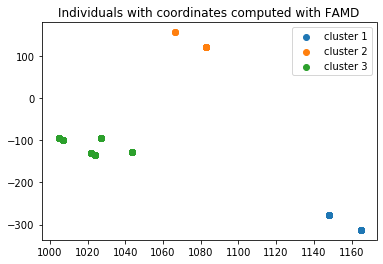

In [17]:
# Ploting individuals with coordinates computed with FAMD
# with color according to the cluster
DF = pd.DataFrame(famd_coordinates.index[idg], groupes_cah[idg])
DF['cluster'] = DF.index
col = ['blue', 'red', 'green']
DF_1 = list(DF[DF['cluster'] == 1][0])
DF_2 = list(DF[DF['cluster'] == 2][0])
DF_3 = list(DF[DF['cluster'] == 3][0])


plt.scatter(famd_coordinates.iloc[DF_1, 0],
            famd_coordinates.iloc[DF_1, 1], label='cluster 1')
plt.scatter(famd_coordinates.iloc[DF_2, 0],
            famd_coordinates.iloc[DF_2, 1], label='cluster 2')
plt.scatter(famd_coordinates.iloc[DF_3, 0],
            famd_coordinates.iloc[DF_3, 1], label='cluster 3')
plt.legend()
plt.title('Individuals with coordinates computed with FAMD')
plt.show()

### Clusters evaluation

In [23]:
score_ax_1 = get_F_score(famd_coordinates[0])

In [24]:
score_ax_2 = get_F_score(famd_coordinates[1])

In [25]:
print(' -> Average clustering score: ' +
      str(np.mean([score_ax_1[0], score_ax_2[0]])))
print('\n -> Commentaries : ' +
      '\n      ' + score_ax_1[1] + " on first ax" +
      '\n      ' + score_ax_2[1] + " on second ax")

 -> Average clustering score: 125696699.5506659

 -> Commentaries : 
      Highly representative cluster on first ax
      Highly representative cluster on second ax


Here clusters are visually and numerically representative.

## Data cleaning and filling work

In [38]:
all_data_cleaning = all_data.copy()

### Cleaning

In [39]:
all_data_cleaning = note(all_data_cleaning, 'Bar_And_Beverages')
all_data_cleaning = note(all_data_cleaning, 'Food_And_Beverages')
all_data_cleaning = note(all_data_cleaning, 'Catering')
all_data_cleaning = note(all_data_cleaning, 'Cleanliness')
all_data_cleaning = note(all_data_cleaning, 'Lounge_Comfort')
all_data_cleaning = note(all_data_cleaning, 'Aisle_Space')
all_data_cleaning = note(all_data_cleaning, 'Seat_Comfort')
all_data_cleaning = note(all_data_cleaning, 'Seat_Recline')
all_data_cleaning = note(all_data_cleaning, 'Seat_Width')
all_data_cleaning = note(all_data_cleaning, 'Washrooms')
all_data_cleaning = note(all_data_cleaning, 'Value_For_Money')
all_data_cleaning = note(all_data_cleaning, 'Cabin_Staff_Service')
all_data_cleaning = note(all_data_cleaning, 'Lounge_Staff_Service')
all_data_cleaning = note(all_data_cleaning, 'Ground_Service')
all_data_cleaning = note(all_data_cleaning, 'Wifi_And_Connectivity')
all_data_cleaning = note(all_data_cleaning, 'Inflight_Entertainment')
all_data_cleaning = note(all_data_cleaning, 'Viewing_Tv_Screen')
all_data_cleaning = note(all_data_cleaning, 'Power_Supply')
all_data_cleaning = note(all_data_cleaning, 'Seat_Legroom')
all_data_cleaning = note(all_data_cleaning, 'Seat_Storage')
all_data_cleaning = note(all_data_cleaning, 'Overall_Airline_Rating')
all_data_cleaning = note_sur_10(all_data_cleaning, 'Overall_Customer_Rating')
all_data_cleaning = note(all_data_cleaning, 'Overall_Service_Rating')

In [40]:
# Replace yes/no by 1/0

all_data_cleaning['Recommended'] = all_data_cleaning['Recommended'].replace(
    "yes", 1)
all_data_cleaning['Recommended'] = all_data_cleaning['Recommended'].replace(
    "no", 0)

### Homogenizing

In [45]:
# New format date

all_data_cleaning['Date_Flown'] = all_data_cleaning['Date_Flown'].fillna("nc")
#all_data['Date_Visit'] = all_data['Date_Visit'].fillna("nc")
all_data_cleaning['Date_Review'] = all_data_cleaning['Date_Review'].fillna(
    "nc")

all_data_cleaning['Date_Flown'] = all_data_cleaning['Date_Flown'].apply(
    format_date)
#all_data['Date_Visit'] = all_data['Date_Visit'].apply(format_date)
all_data_cleaning['Date_Review'] = all_data_cleaning['Date_Review'].apply(
    format_date)

Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the func

Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Form

Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the func

Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Form

Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the func

Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Form

Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Form

Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Form

Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Form

Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the function "format_date".
Format not recognised. 
Consider adding a date format in the func

### Feature engineering

In [48]:
all_data_cleaning['num_sem_Date_Review'] = 0
all_data_cleaning['num_sem_Date_Review'] = all_data_cleaning.apply(
    lambda row: row['Date_Review'].isocalendar()[1] if row['Date_Review'] != "nc" else "nc", axis=1)
all_data_cleaning['vac_Date_Review'] = 0
all_data_cleaning['vac_Date_Review'] = all_data_cleaning.apply(
    lambda row: row['Date_Review'] in holidays.FRA() if row['Date_Review'] != "nc" else "nc", axis=1)
all_data_cleaning['vac_Date_Review'] = all_data_cleaning['vac_Date_Review'].replace(
    "True", 1)
all_data_cleaning['vac_Date_Review'] = all_data_cleaning['vac_Date_Review'].replace(
    "False", 0)

all_data_cleaning['num_sem_Date_Flown'] = 0
all_data_cleaning['num_sem_Date_Flown'] = all_data_cleaning.apply(
    lambda row: row['Date_Flown'].isocalendar()[1] if row['Date_Flown'] != "nc" else "nc", axis=1)
all_data_cleaning['vac_Date_Flown'] = 0
all_data_cleaning['vac_Date_Flown'] = all_data_cleaning.apply(
    lambda row: row['Date_Flown'] in holidays.FRA() if row['Date_Flown'] != "nc" else "nc", axis=1)
all_data_cleaning['vac_Date_Flown'] = all_data_cleaning['vac_Date_Flown'].replace(
    "True", 1)
all_data_cleaning['vac_Date_Flown'] = all_data_cleaning['vac_Date_Flown'].replace(
    "False", 0)

In [49]:
# Division of many type

all_data_cleaning[['Aircraft_Type1', 'Aircraft_Type2', 'Aircraft_Type3', 'Aircraft_Type4']
                  ] = all_data_cleaning.Aircraft_Type.apply(lambda x: pd.Series(str(x).split("/")))
all_data_cleaning = all_data_cleaning.drop(['Aircraft_Type'], axis=1)

In [50]:
# Divide column Route between Arrival and Departure.

all_data_cleaning['Departure'], all_data_cleaning['Arrival'] = all_data_cleaning['Route'].str.split(
    'to', 1).str
all_data_cleaning['No stop'], all_data_cleaning['Stop'] = all_data_cleaning['Route'].str.split(
    'via', 1).str
all_data_cleaning.drop(columns=['No stop', 'Route'], inplace=True)

In [52]:
all_data_cleaning[['Category_Detail', 'Airport', 'Category']] = all_data_cleaning[[
    'Category_Detail', 'Airport', 'Category']].fillna('nc')

# Change "&", "/" to "and" to standardize.


def changes(sentence):
    if sentence != "nc":
        new = sentence
        for i in range(0, len(sentence)):
            if sentence[i] == '&':
                new = sentence.replace("&", " and ")
            if sentence[i] == '/':
                new = sentence.replace("/", " and ")
        return(new)


all_data_cleaning['Category_Detail'] = all_data_cleaning['Category_Detail'].apply(
    lambda x: changes(x))
all_data_cleaning['Category_Detail'] = all_data_cleaning['Category_Detail'].replace(
    "nc", np.nan)
#all_data['Airport'] = all_data['Airport'].replace("nc",np.nan)
all_data_cleaning['Category'] = all_data_cleaning['Category'].replace(
    "nc", np.nan)

In [53]:
all_data_cleaning

,Data_Source,Airline_Name,Airline_Type,Region_Operation,Cabin_Class,Type_Of_Lounge,Type_Of_Traveller,Date_Visit,Date_Flown,Airport,...,vac_Date_Review,num_sem_Date_Flown,vac_Date_Flown,Aircraft_Type1,Aircraft_Type2,Aircraft_Type3,Aircraft_Type4,Departure,Arrival,Stop
0,Airline Quality Airline,ab-aviation,NaN,NaN,Economy Class,NaN,Solo Leisure,NaN,2019-06-01 00:00:00,nc,...,False,22,False,E120,NaN,NaN,NaN,Moroni,Anjouan,NaN
1,Airline Quality Airline,ab-aviation,NaN,NaN,Economy Class,NaN,Solo Leisure,NaN,2019-06-01 00:00:00,nc,...,False,22,False,Embraer E120,NaN,NaN,NaN,Anjouan,Dzaoudzi,NaN
2,Airline Quality Airline,adria-airways,NaN,NaN,Economy Class,NaN,Solo Leisure,NaN,2019-09-01 00:00:00,nc,...,False,35,False,nan,NaN,NaN,NaN,Frankfurt,Pristina,NaN
3,Airline Quality Airline,adria-airways,NaN,NaN,Economy Class,NaN,Couple Leisure,NaN,2019-09-01 00:00:00,nc,...,False,35,False,nan,NaN,NaN,NaN,Sofia,Amsterdam via Ljubljana,Ljubljana
4,Airline Quality Airline,adria-airways,NaN,NaN,Economy Class,NaN,Couple Leisure,NaN,2019-09-01 00:00:00,nc,...,False,35,False,CR 900,NaN,NaN,NaN,Sarajevo,Ljubljana,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150448,Skytrax,xiamen-airlines,Full service,Asia,Economy Class,NaN,NaN,NaN,nc,nc,...,nc,nc,nc,nan,NaN,NaN,NaN,NaN,NaN,NaN
150449,Skytrax,xiamen-airlines,Full service,Asia,Economy Class,NaN,NaN,NaN,nc,nc,...,nc,nc,nc,nan,NaN,NaN,NaN,NaN,NaN,NaN
150450,Skytrax,xiamen-airlines,Full service,Asia,Economy Class,NaN,NaN,NaN,nc,nc,...,nc,nc,nc,nan,NaN,NaN,NaN,NaN,NaN,NaN
150451,Skytrax,xiamen-airlines,Full service,Asia,Economy Class,NaN,NaN,NaN,nc,nc,...,nc,nc,nc,nan,NaN,NaN,NaN,NaN,NaN,NaN


### Analysis

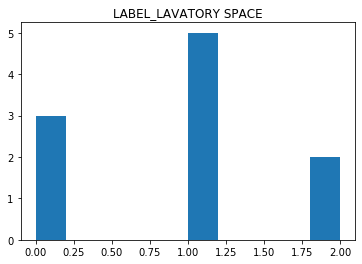

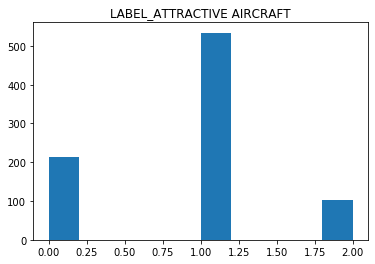

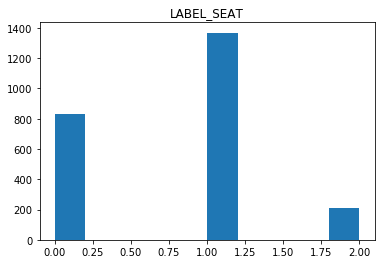

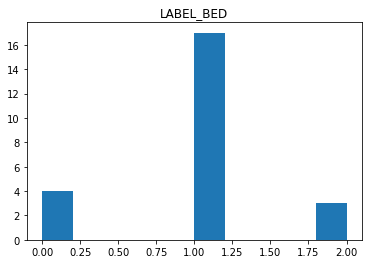

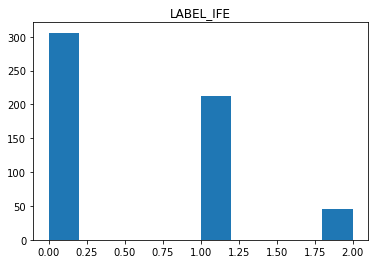

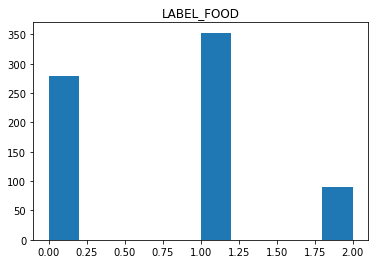

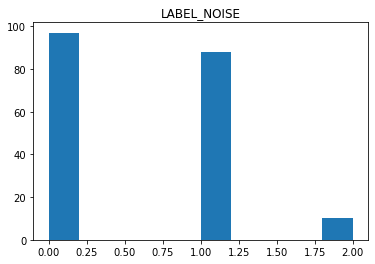

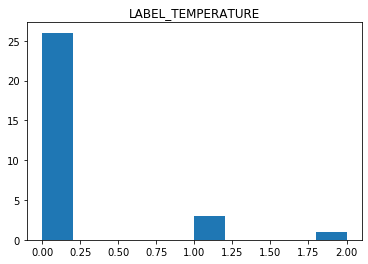

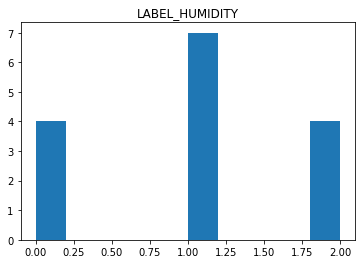

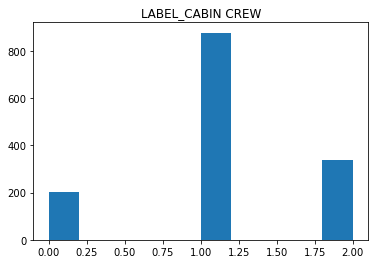

In [60]:
# Analyzes the number of values per predictor variable on data_annotate file

name_label_prediction = ['LABEL_LAVATORY SPACE', 'LABEL_ATTRACTIVE AIRCRAFT', 'LABEL_SEAT', 'LABEL_BED',
                         'LABEL_IFE', 'LABEL_FOOD', 'LABEL_NOISE', 'LABEL_TEMPERATURE', 'LABEL_HUMIDITY', 'LABEL_CABIN CREW']

for label in name_label_prediction:
    plt.figure()
    plt.hist(all_data_annotate[label], range=(0, 2))
    plt.title(label)
    plt.show()

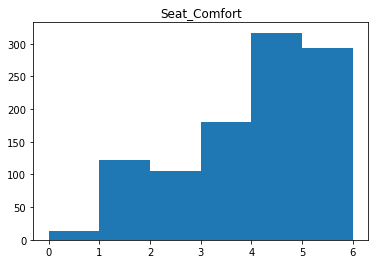

In [61]:
# Analyzes the number of values per predictor variable on data_annotate file

plt.figure()
plt.hist(all_data_annotate['Seat_Comfort'], range=(0, 6), bins=6)
plt.title('Seat_Comfort')
plt.show()

# Reasearch work

Our reasearch during last days have been about : 
- Interpretation of models based on binarized data : How can we explain a model, as its most important features are a modality of a variable, and not only a variable ? What we found was : 
    - Re-merge into basic variables by making a mean on weights
- Grid search on lgbm models. What we found didn't help us improve that much our results, as modifying deth or number of leaves overfit really quickly.